# 4.  Use the Google stock prices dataset and design a time seriesanalysis and prediction system using RNN.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt


# Get the data for the stock GOOG
df = yf.download('GOOGL', start='2010-01-01', end='2022-12-31', progress=False)

data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [3]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [4]:
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


In [5]:
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [6]:
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse' , metrics=['mse' , 'accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
82/82 [==============================] - 1s 2ms/step - loss: 9.3559e-04 - mse: 9.3559e-04 - accuracy: 3.8358e-04
Epoch 2/20
82/82 [==============================] - 0s 2ms/step - loss: 3.5947e-05 - mse: 3.5947e-05 - accuracy: 3.8358e-04
Epoch 3/20
82/82 [==============================] - 0s 2ms/step - loss: 3.3845e-05 - mse: 3.3845e-05 - accuracy: 3.8358e-04
Epoch 4/20
82/82 [==============================] - 0s 3ms/step - loss: 3.3193e-05 - mse: 3.3193e-05 - accuracy: 3.8358e-04
Epoch 5/20
82/82 [==============================] - 0s 2ms/step - loss: 3.4842e-05 - mse: 3.4842e-05 - accuracy: 3.8358e-04
Epoch 6/20
82/82 [==============================] - 0s 2ms/step - loss: 3.1052e-05 - mse: 3.1052e-05 - accuracy: 3.8358e-04
Epoch 7/20
82/82 [==============================] - 0s 2ms/step - loss: 2.9951e-05 - mse: 2.9951e-05 - accuracy: 3.8358e-04
Epoch 8/20
82/82 [==============================] - 0s 2ms/step - loss: 2.9788e-05 - mse: 2.9788e-05 - accuracy: 3.8358e-04
Epoch 9/

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


21/21 [==============================] - 0s 909us/step


In [8]:
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)


In [13]:
df['Close']

Date
2010-01-04    15.684434
2010-01-05    15.615365
2010-01-06    15.221722
2010-01-07    14.867367
2010-01-08    15.065566
                ...    
2022-12-23    89.230003
2022-12-27    87.389999
2022-12-28    86.019997
2022-12-29    88.449997
2022-12-30    88.230003
Name: Close, Length: 3272, dtype: float64

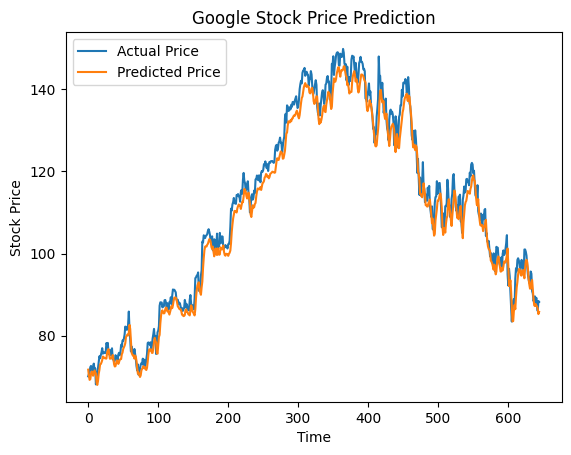

In [12]:
actual_test = df['Close'][train_size + sequence_length:].values.reshape(-1, 1)
pred_test = y_test_pred_inv

#  plot the actual price vs predicted price
plt.plot(actual_test, label='Actual Price')
plt.plot(pred_test, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()